In [1]:
cd

C:\Users\Hp


In [3]:
cd E:\Machine learning\dataset

E:\Machine learning\dataset


#### Import libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from pandas.plotting import scatter_matrix
from matplotlib import cm
from sklearn.neighbors import KNeighborsClassifier as knn
%matplotlib inline

#### Load the data

In [5]:
data=pd.read_csv('fruit_data_with_colours.csv')

In [6]:
print(data)

    fruit_label fruit_name     fruit_subtype  mass  width  height  color_score
0             1      apple      granny_smith   192    8.4     7.3         0.55
1             1      apple      granny_smith   180    8.0     6.8         0.59
2             1      apple      granny_smith   176    7.4     7.2         0.60
3             2   mandarin          mandarin    86    6.2     4.7         0.80
4             2   mandarin          mandarin    84    6.0     4.6         0.79
5             2   mandarin          mandarin    80    5.8     4.3         0.77
6             2   mandarin          mandarin    80    5.9     4.3         0.81
7             2   mandarin          mandarin    76    5.8     4.0         0.81
8             1      apple          braeburn   178    7.1     7.8         0.92
9             1      apple          braeburn   172    7.4     7.0         0.89
10            1      apple          braeburn   166    6.9     7.3         0.93
11            1      apple          braeburn   172  

In [7]:
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [8]:
data.tail()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
54,4,lemon,unknown,116,6.1,8.5,0.71
55,4,lemon,unknown,116,6.3,7.7,0.72
56,4,lemon,unknown,116,5.9,8.1,0.73
57,4,lemon,unknown,152,6.5,8.5,0.72
58,4,lemon,unknown,118,6.1,8.1,0.70


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [10]:
data.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


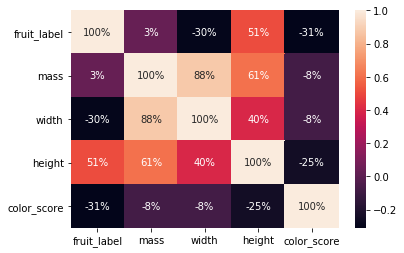

In [11]:
import seaborn as sb
sb.heatmap(data.corr(), annot=True, fmt='.0%')

#### Splitting dataset into train and test

In [12]:
x = data[['mass','width','height','color_score']]
y = data['fruit_label']

In [13]:
print(x)

    mass  width  height  color_score
0    192    8.4     7.3         0.55
1    180    8.0     6.8         0.59
2    176    7.4     7.2         0.60
3     86    6.2     4.7         0.80
4     84    6.0     4.6         0.79
5     80    5.8     4.3         0.77
6     80    5.9     4.3         0.81
7     76    5.8     4.0         0.81
8    178    7.1     7.8         0.92
9    172    7.4     7.0         0.89
10   166    6.9     7.3         0.93
11   172    7.1     7.6         0.92
12   154    7.0     7.1         0.88
13   164    7.3     7.7         0.70
14   152    7.6     7.3         0.69
15   156    7.7     7.1         0.69
16   156    7.6     7.5         0.67
17   168    7.5     7.6         0.73
18   162    7.5     7.1         0.83
19   162    7.4     7.2         0.85
20   160    7.5     7.5         0.86
21   156    7.4     7.4         0.84
22   140    7.3     7.1         0.87
23   170    7.6     7.9         0.88
24   342    9.0     9.4         0.75
25   356    9.2     9.2         0.75
2

In [14]:
print(y)

0     1
1     1
2     1
3     2
4     2
5     2
6     2
7     2
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    3
25    3
26    3
27    3
28    3
29    3
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
40    3
41    3
42    3
43    4
44    4
45    4
46    4
47    4
48    4
49    4
50    4
51    4
52    4
53    4
54    4
55    4
56    4
57    4
58    4
Name: fruit_label, dtype: int64


In [15]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=215)

In [16]:
print(x_train)

    mass  width  height  color_score
18   162    7.5     7.1         0.83
44   200    7.3    10.5         0.72
42   154    7.2     7.2         0.82
54   116    6.1     8.5         0.71
35   150    7.1     7.9         0.75
25   356    9.2     9.2         0.75
51   116    6.0     7.5         0.72
38   158    7.2     7.8         0.77
12   154    7.0     7.1         0.88
13   164    7.3     7.7         0.70
55   116    6.3     7.7         0.72
22   140    7.3     7.1         0.87
27   204    7.5     9.2         0.77
52   118    5.9     8.0         0.72
24   342    9.0     9.4         0.75
48   174    7.3    10.1         0.72
0    192    8.4     7.3         0.55
36   160    7.1     7.6         0.76
20   160    7.5     7.5         0.86
34   142    7.6     7.8         0.75
5     80    5.8     4.3         0.77
29   160    7.0     7.4         0.81
16   156    7.6     7.5         0.67
1    180    8.0     6.8         0.59
46   216    7.3    10.2         0.71
17   168    7.5     7.6         0.73
5

In [17]:
print(x_test)

    mass  width  height  color_score
3     86    6.2     4.7         0.80
9    172    7.4     7.0         0.89
56   116    5.9     8.1         0.73
2    176    7.4     7.2         0.60
7     76    5.8     4.0         0.81
33   190    7.5     8.1         0.74
8    178    7.1     7.8         0.92
28   140    6.7     7.1         0.72
40   154    7.1     7.5         0.78
53   120    6.0     8.4         0.74
19   162    7.4     7.2         0.85
10   166    6.9     7.3         0.93


In [18]:
print(y_test)

3     2
9     1
56    4
2     1
7     2
33    3
8     1
28    3
40    3
53    4
19    1
10    1
Name: fruit_label, dtype: int64


In [19]:
print(y_train)

18    1
44    4
42    3
54    4
35    3
25    3
51    4
38    3
12    1
13    1
55    4
22    1
27    3
52    4
24    3
48    4
0     1
36    3
20    1
34    3
5     2
29    3
16    1
1     1
46    4
17    1
58    4
50    4
39    3
49    4
21    1
41    3
11    1
23    1
47    4
45    4
32    3
57    4
43    4
31    3
30    3
15    1
37    3
14    1
4     2
26    3
6     2
Name: fruit_label, dtype: int64


#### KNeighborsClassifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier as knn
knnmodel=knn(n_neighbors=3)
knnmodel.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

#### Estimating the accuracy of our model

In [21]:
accuracy = knnmodel.score(x_test,y_test)
predicted = knnmodel.predict(x_test)

In [22]:
print('Accuracy:',accuracy)

Accuracy: 0.9166666666666666


#### The accuracy of the KNN classifier according to the choice of parameter K(number of neighbours)

([<matplotlib.axis.XTick at 0x248fe825f48>,
 <a list of 5 Text xticklabel objects>)

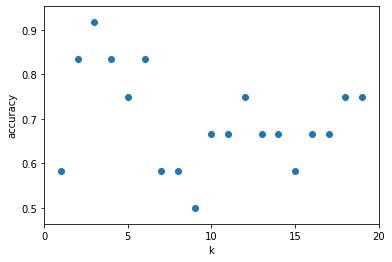

In [23]:
k_range = range(1,20)
scores = []

for k in k_range:
  knnmodel = knn(n_neighbors=k)
  knnmodel.fit(x_train, y_train)
  scores.append(knnmodel.score(x_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [24]:
scores.index(max(scores))

2

#### Data Visualization 

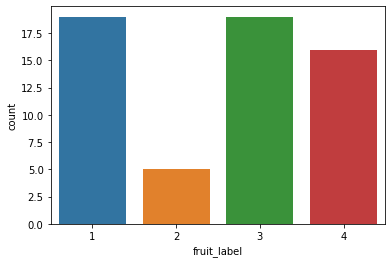

In [25]:
import seaborn as sb
sb.countplot(x='fruit_label',data=data)

In [26]:
data['fruit_label'].value_counts()

3    19
1    19
4    16
2     5
Name: fruit_label, dtype: int64

fruit_label       AxesSubplot(0.125,0.657941;0.133621x0.222059)
mass           AxesSubplot(0.285345,0.657941;0.133621x0.222059)
width           AxesSubplot(0.44569,0.657941;0.133621x0.222059)
height         AxesSubplot(0.606034,0.657941;0.133621x0.222059)
color_score    AxesSubplot(0.766379,0.657941;0.133621x0.222059)
dtype: object

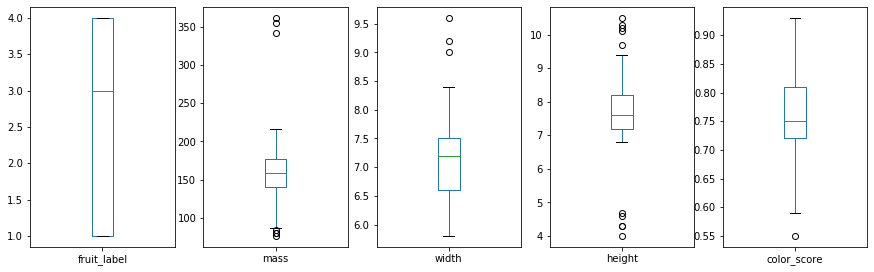

In [27]:
data.plot(kind='box',subplots=True,layout=(3,5),figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000248FED334C8>,
      dtype=object)

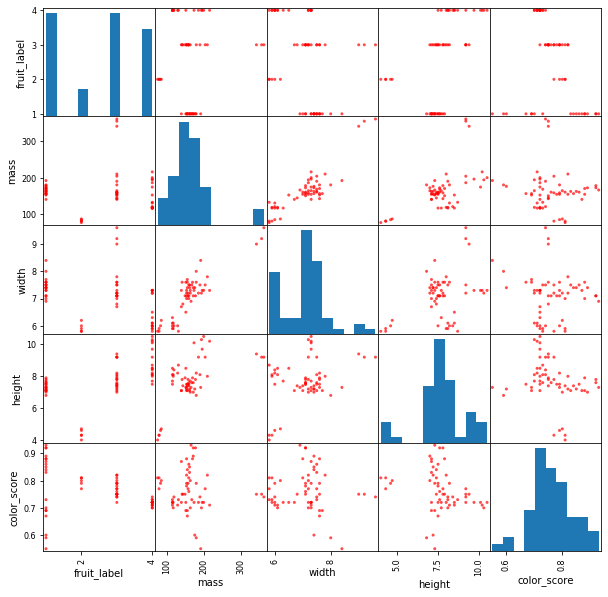

In [28]:
from pandas.plotting  import scatter_matrix as sm
sm(data,c='r',alpha=0.7,figsize=(10,10))

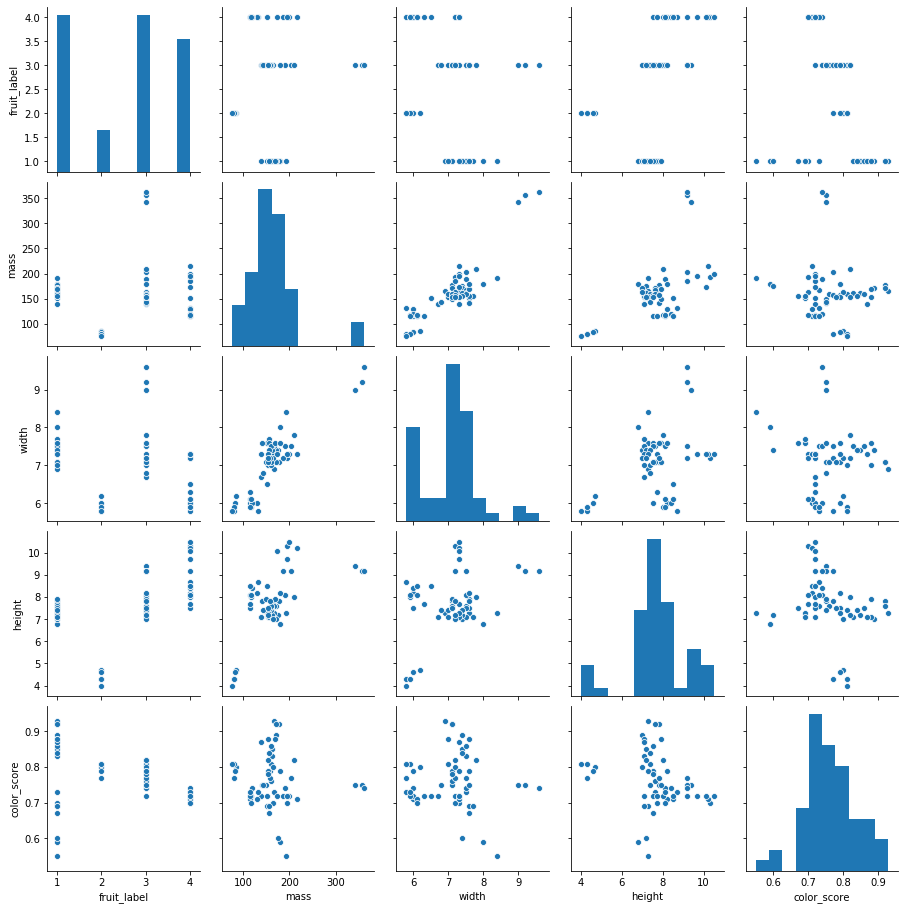

In [29]:
sb.pairplot(data)

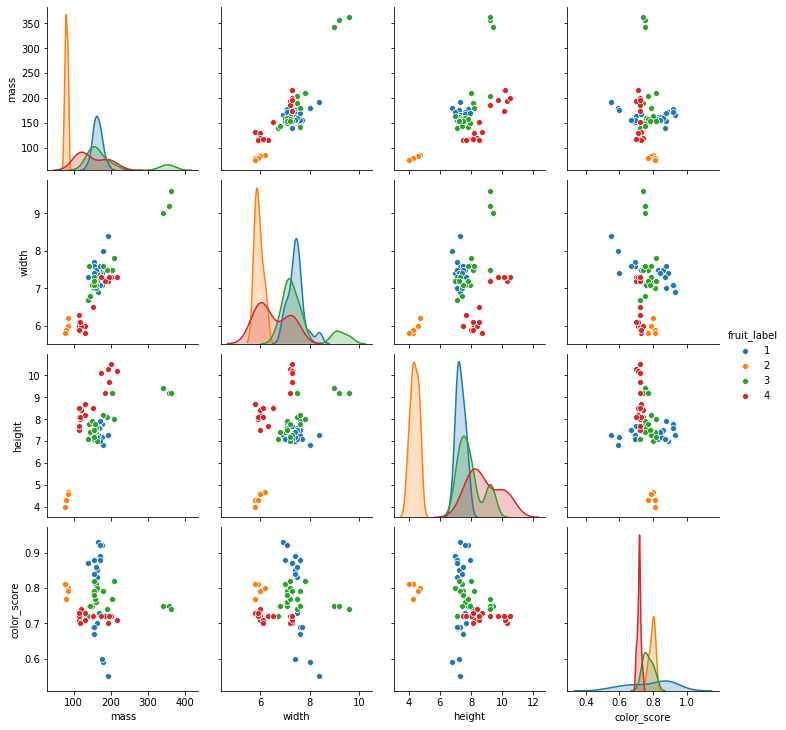

In [30]:
sb.pairplot(data,hue='fruit_label')